# **HEART DISEASE DIAGNOSTIC ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart Disease data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(1025, 14)

Here we can see that the database contains data of 1025 patients. So all further observations we make will be based on the data of these 1025 patients

In [6]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


The dataset contains the following columns:

age: Age of the patient <br>
sex: Sex of the patient (1 = male; 0 = female)<br>
cp: Chest pain type (0, 1, 2, 3)<br>
trestbps: Resting blood pressure (in mm Hg)<br>
chol: Serum cholesterol in mg/dl<br>
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)<br>
restecg: Resting electrocardiographic results (0, 1, 2)<br>
thalach: Maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest<br>
slope: Slope of the peak exercise ST segment (0, 1, 2)<br>
ca: Number of major vessels (0-3) colored by fluoroscopy<br>
thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)<br>
target: Presence of heart disease (1 = yes; 0 = no)<br>

# Exploratory Data Analysis (EDA)

### 1. Heart Disease Rates

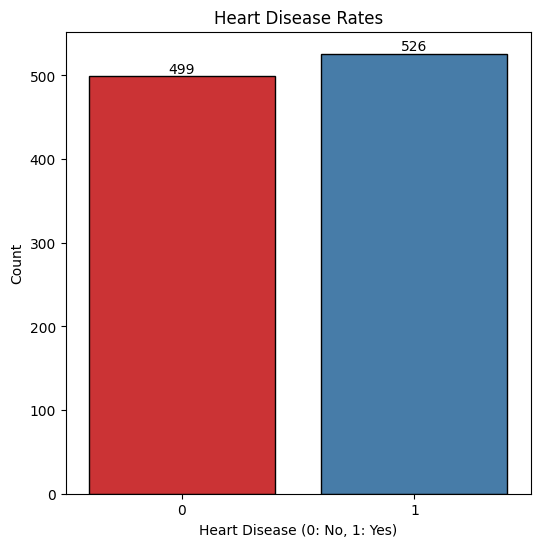

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

plot = sns.countplot(x='target', data=df, hue = 'target', palette='Set1', edgecolor= 'k', legend = False)

plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])

plt.title('Heart Disease Rates')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#### Observation
We can see that a total of 526 people are having heart disease from the data collected of 1025 patients, which is almost half of the people in the database

### 2. Distribution of Heart Disease by Gender

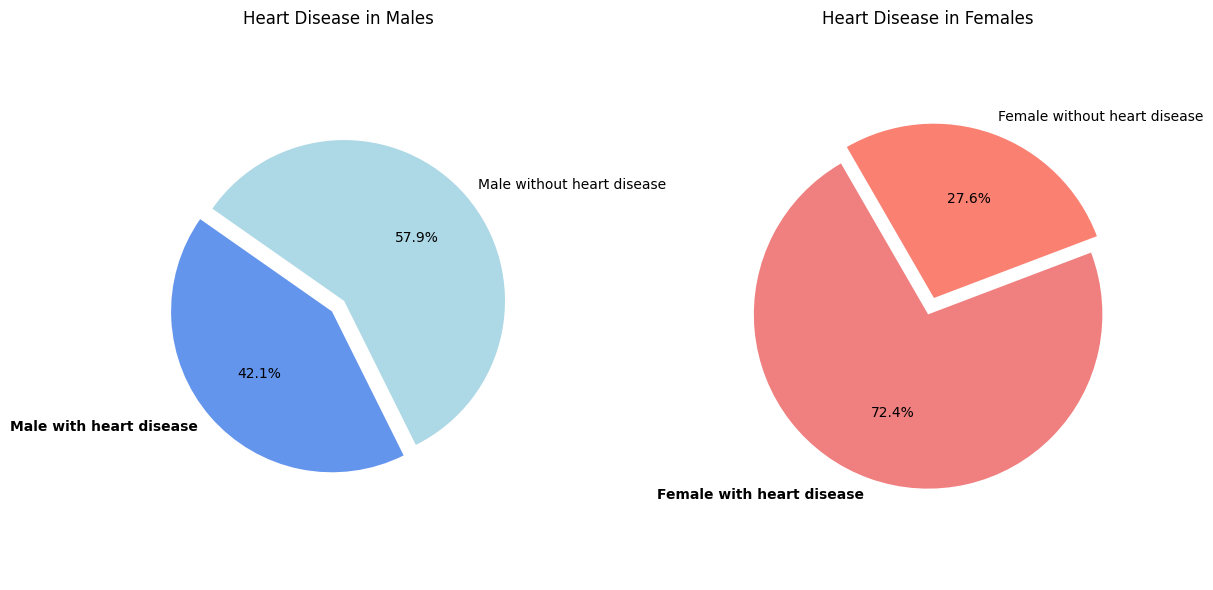

In [8]:

gender_disease_counts = df.groupby(['sex', 'target']).size().unstack(fill_value=0)


male_counts = [gender_disease_counts.loc[1, 1], gender_disease_counts.loc[1, 0]]  # Male with and without heart disease
female_counts = [gender_disease_counts.loc[0, 1], gender_disease_counts.loc[0, 0]]  # Female with and without heart disease


male_labels = ['Male with heart disease', 'Male without heart disease']
female_labels = ['Female with heart disease', 'Female without heart disease']

colors1 = ['cornflowerblue', 'lightblue']
colors2 = ['lightcoral', 'salmon']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


explode_male = (0.1, 0)  
wedges1, texts1, autotexts1 = ax1.pie(male_counts, labels=male_labels, autopct='%1.1f%%', startangle=145, explode=explode_male, colors = colors1)
ax1.set_title('Heart Disease in Males')
ax1.axis('equal')  


for text in texts1:
    if "with heart disease" in text.get_text():
        text.set_fontweight('bold')



explode_female = (0.1, 0)  
wedges2, texts2, autotexts2 = ax2.pie(female_counts, labels=female_labels, autopct='%1.1f%%', startangle=120, explode=explode_female, colors = colors2)
ax2.set_title('Heart Disease in Females')
ax2.axis('equal') 

for text in texts2:
    if "with heart disease" in text.get_text():
        text.set_fontweight('bold')

plt.tight_layout()
plt.show()

#### Observation
We have created a pie chart for the Heart Disease rate by gender and we have highlighted Males and Females who are having heart diseases. Looking at the above pie chart, we can see that a whopping 72.4% of all total female patients recorded have heart diseases while 42.1% of all total male patients have heart diseases. This clearly depicts that the heart disease percentages is more in the case of females than in males as per the data collected in the database.

### 3. Age Distribution of Patients with Heart Disease

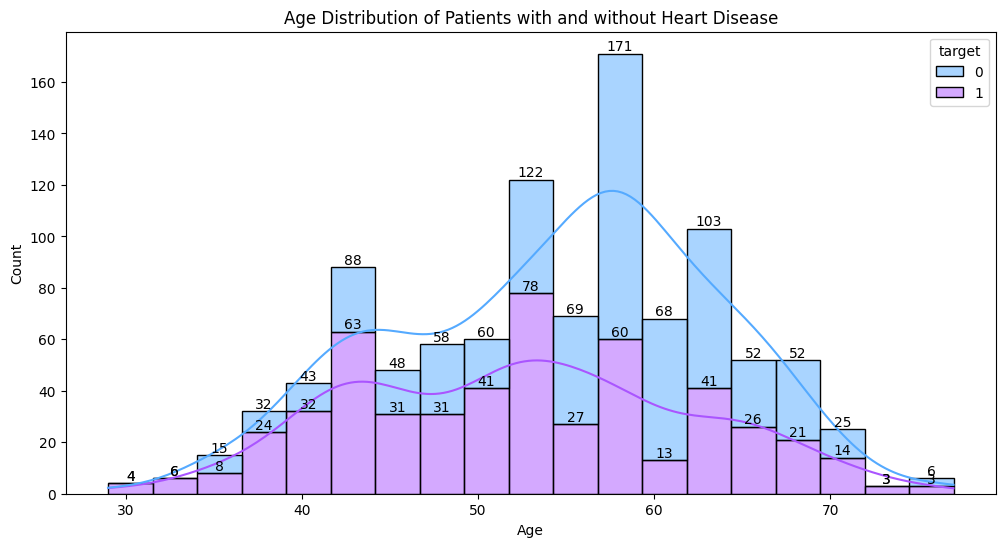

In [9]:
plt.figure(figsize=(12, 6))
plot = sns.histplot(x='age', hue='target', multiple = 'stack', data = df, palette='cool', legend = True, kde = True)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Observation
As per the above histogram, we can observe that the distribution of patients with heart disease is more spread out compared to those without heart disease. The largest group of patients with heart disease is around the age of 45, with a count of 78. Another significant group is around the age of 50, with a count of 60. There is a smaller but noticeable group of patients with heart disease around the ages of 60 and 65.

### 4. Correlation Between Attributes

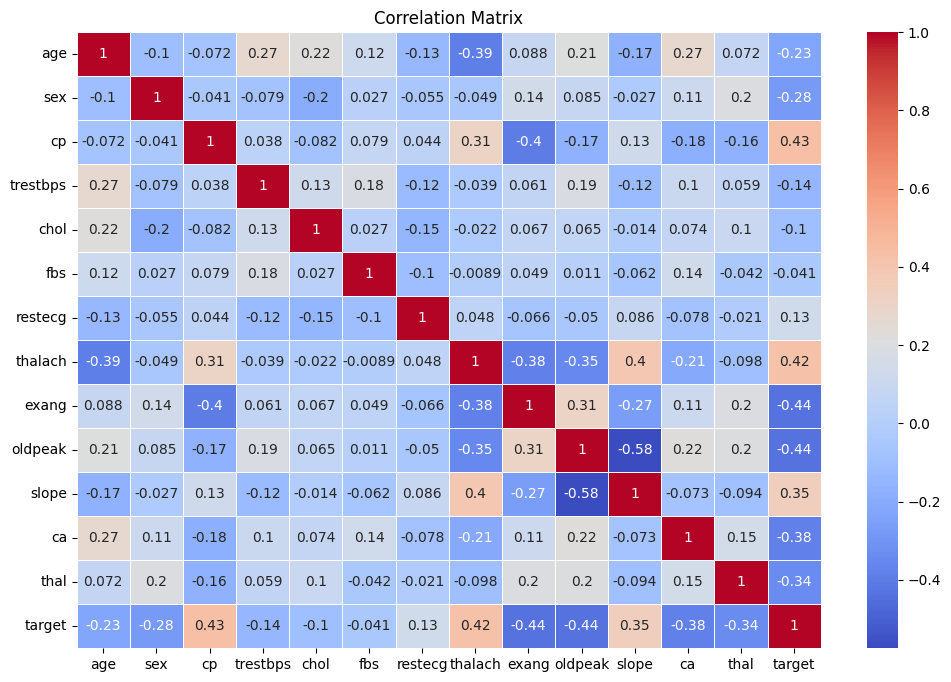

In [10]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Observation
* cp (chest pain type) has a positive correlation (0.43) with the target, indicating that higher chest pain types are associated with heart disease.
* thalach (maximum heart rate achieved) also has a positive correlation (0.42) with the target.
* slope of the peak exercise ST segment has a positive correlation (0.35) with the target.
* exang (exercise induced angina) has a strong negative correlation (-0.44) with the target, meaning the presence of exercise-induced angina is associated with a lower likelihood of heart disease.
* oldpeak (ST depression induced by exercise) also has a negative correlation (-0.44) with the target.
* ca (number of major vessels colored by fluoroscopy) and thal (thalassemia) have negative correlations (-0.38 and -0.34, respectively) with the target.
* sex (gender) has a negative correlation (-0.28), indicating that males (coded as 1) are more likely to have heart disease compared to females (coded as 0).
* age has a small negative correlation (-0.23), indicating a slight increase in heart disease with age.

Other Notable Correlations:

* age and thalach have a significant negative correlation (-0.39), indicating that maximum heart rate achieved decreases with age.
* cp and thalach have a positive correlation (0.31), suggesting that higher chest pain types are associated with higher maximum heart rates.
* exang and thalach have a significant negative correlation (-0.38), meaning exercise-induced angina is associated with lower maximum heart rates.
* ca and oldpeak have a positive correlation (0.31), indicating that the number of major vessels colored by fluoroscopy is associated with higher ST depression induced by exercise.
* oldpeak and slope have a significant negative correlation (-0.58), indicating that higher ST depression induced by exercise is associated with a more downsloping peak exercise ST segment.

### 5. Comparison of Heart Disease Presence by Chest Pain Type

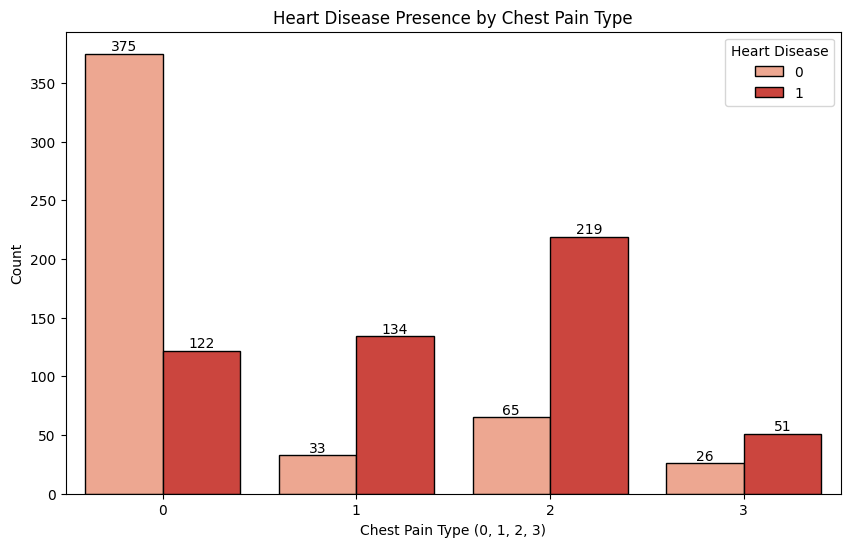

In [11]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='cp', hue='target', data=df, palette='Reds', edgecolor = 'k')
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type (0, 1, 2, 3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


First of all, there are 4 different types of chest pain that is shown:
* 0: Typical Angina
* 1: Atypical Angina
* 2: Non-anginal Pain
* 3: Asymptomatic
  
#### Observation
Patients with typical angina are more likely to not have heart disease.
Patients with atypical angina, non-anginal pain, and asymptomatic chest pain are more likely to have heart disease.
The presence of heart disease is highest among patients with non-anginal pain, followed by atypical angina and asymptomatic chest pain. Typical angina is the least likely to be associated with heart disease.


### 6. Effect of Maximum Heart Rate on Heart Disease

In [12]:
mean_thalach_no_disease = df[df['target'] == 0]['thalach'].mean()
mean_thalach_disease = df[df['target'] == 1]['thalach'].mean()

print('Mean of Maximum Heart Rate of people with no heart disease', mean_thalach_no_disease)
print('Mean of Maximum Heart Rate of people with heart disease', mean_thalach_disease)

Mean of Maximum Heart Rate of people with no heart disease 139.1302605210421
Mean of Maximum Heart Rate of people with heart disease 158.58555133079847


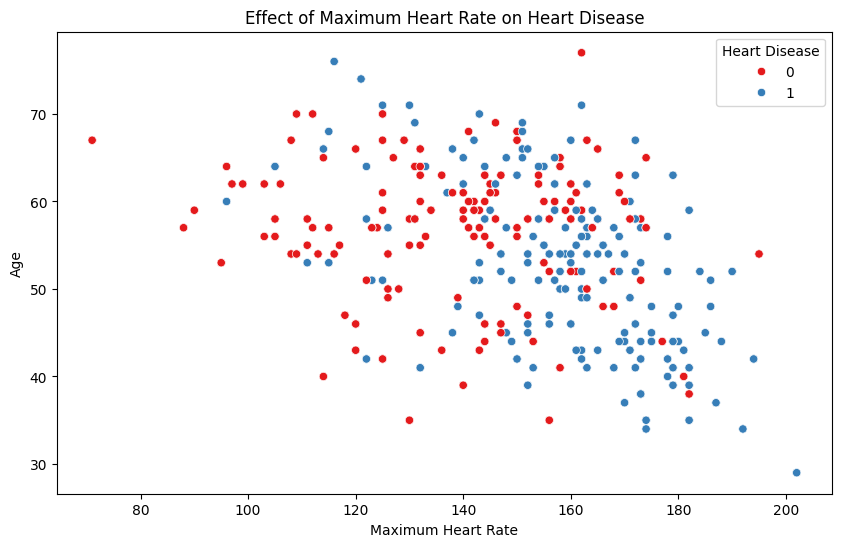

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'thalach', y = 'age', hue = 'target', data = df, palette = 'Set1')
plt.title('Effect of Maximum Heart Rate on Heart Disease')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.legend(title = 'Heart Disease', loc = 'upper right')
plt.grid(False)
plt.show()

#### Observation
The above scatter plot shows the effect of maximum heart rate on heart disease, with the age of the patients on the y-axis and the maximum heart rate on the x-axis. The red dots represent patients without heart disease, and the blue dots represent patients with heart disease. Here are some observations:

* Distribution by Age and Heart Rate:

Patients without heart disease (red dots) are more spread out across the age and maximum heart rate spectrum.
Patients with heart disease (blue dots) seem to cluster more tightly, especially in the middle ranges of both age and heart rate.

* High Heart Rate and Heart Disease:

There are fewer blue dots at higher maximum heart rates (above 160), indicating that patients with higher maximum heart rates tend not to have heart disease.
Conversely, there are more red dots (no heart disease) in the higher maximum heart rate ranges.

* Low Heart Rate and Heart Disease:

At lower maximum heart rates (below 100), there are fewer data points overall, but heart disease presence (blue dots) is noticeable.
* Middle Age Group:
 
A significant cluster of both red and blue dots is seen in the age range of 50 to 60, indicating a concentration of patients in this age range.

* General Trend:

The plot suggests that higher maximum heart rates are generally associated with the absence of heart disease, while lower maximum heart rates might be associated with the presence of heart disease.

### 7. Resting Blood Pressure vs. Heart Disease

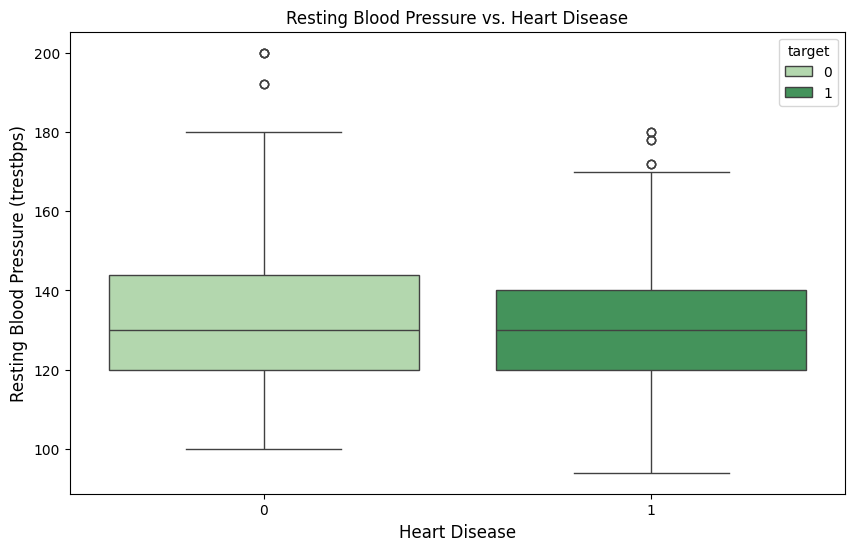

In [14]:
# Resting blood pressure vs. heart disease
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x='target', y='trestbps', hue = 'target', data=df, palette='Greens', legend = True)
plt.title('Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Heart Disease', fontsize = 12)
plt.ylabel('Resting Blood Pressure (trestbps)', fontsize = 12)
#plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


#### Observation
The significant observations from the boxplot of relationship between Heart Disease (target) and Resting Blood Pressure (trestbps) are:

* Median Resting Blood Pressure:

    The median resting blood pressure is slightly higher for patients without heart disease (around 130) compared to those with heart disease (around 125).

* <u> Interquartile Range (IQR):<u>

    The IQR (the range between the first quartile (Q1) and the third quartile (Q3)) is wider for patients without heart disease compared to those with heart disease.
This indicates a greater variability in resting blood pressure for patients without heart disease.

* <u> Outliers:<u>

    There are a few outliers in both groups. The patients without heart disease have higher outliers above 180, while those with heart disease have outliers above 160.

* <u>Overall Range:<u>

    The overall range of resting blood pressure is similar for both groups, from around 100 to 180-200.

* <u>General Trend:<u>

    There is no significant difference in the central tendency of resting blood pressure between the two groups. However, patients without heart disease tend to have a slightly higher median and more variability in their blood pressure.
These observations suggest that resting blood pressure alone may not be a strong indicator of heart disease, as the distributions for both groups overlap significantly.

### 8. Cholesterol Levels vs. Heart Disease

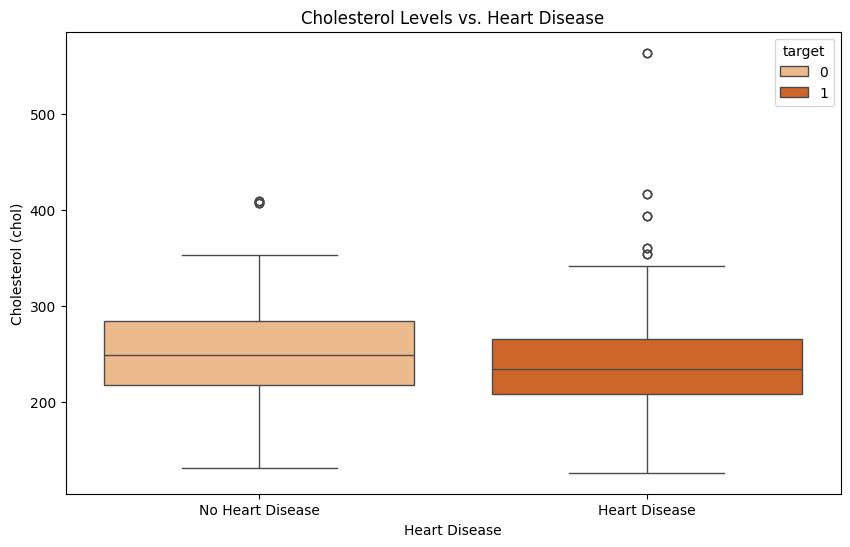

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='Oranges', hue = 'target')
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (chol)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


The significant observations from the boxplot of relationship between Heart Disease (target) and Cholestrol (chol) are:

* Median Cholesterol Levels:

    Individuals without heart disease (target = 0) have a slightly higher median cholesterol level compared to those with heart disease (target = 1).

* Interquartile Range (IQR):

    The IQR for both groups is similar, indicating a similar spread in cholesterol levels for both groups. The range is roughly between 200 and 300 for both groups.

* Outliers:

    Both groups show the presence of outliers, with cholesterol levels significantly higher than the rest of the data. There are more outliers in the group with heart disease compared to the group without heart disease.

* Whiskers:

    The whiskers (lines extending from the boxes) for both groups show the minimum and maximum non-outlier values. The maximum non-outlier values for both groups are around 300. The minimum non-outlier values for both groups are around 200.

* Overall Spread:

    The overall spread of cholesterol levels is quite similar for both groups. Both groups have similar lower and upper quartiles, indicating a similar distribution of cholesterol levels among those with and without heart disease.

While there are slight differences in the median and the presence of more outliers in the heart disease group, the overall distribution and spread of cholesterol levels are similar for both groups. This suggests that cholesterol levels alone may not be a strong distinguishing factor between individuals with and without heart disease.

### 9. Exercise-Induced Angina vs. Heart Disease

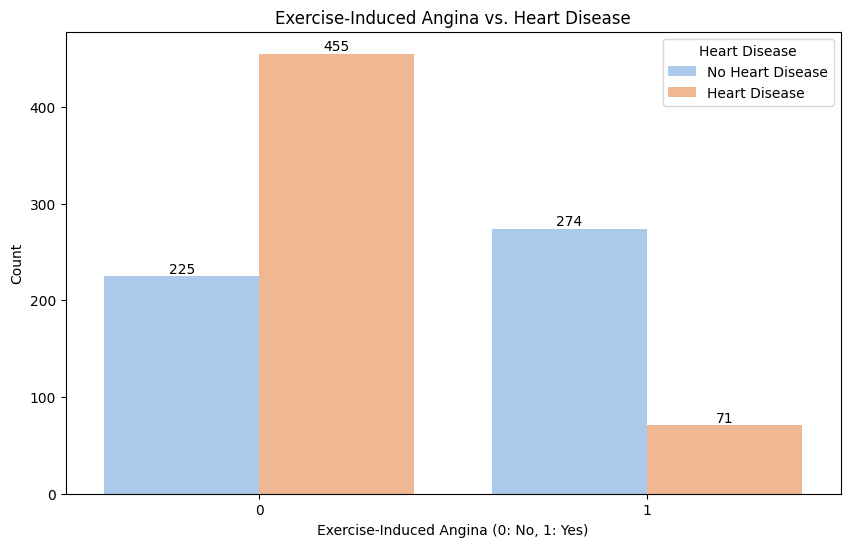

In [16]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='exang', hue='target', data=df, palette='pastel')
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()


#### Observation
Here we can observe that patients without Exercise-Induced Angina are more prone to having heart diseases.

### 10. ST Depression (Oldpeak) vs. Heart Disease

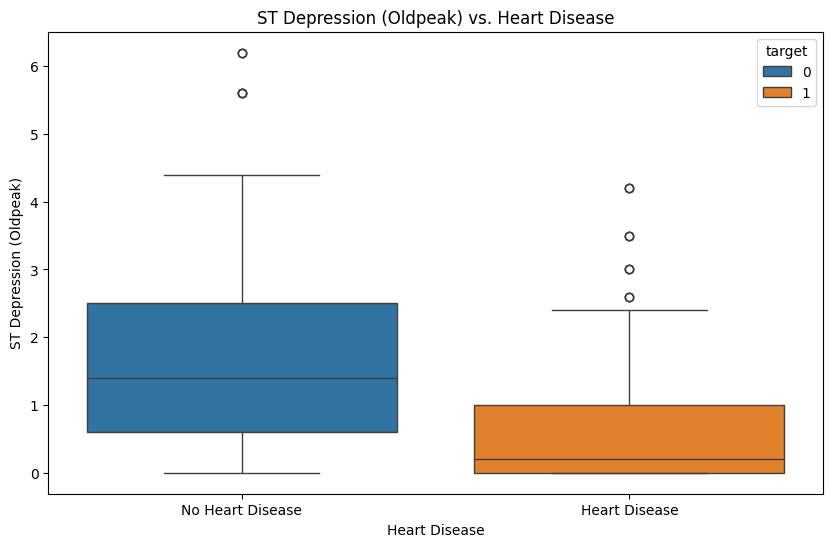

In [17]:
# ST depression (oldpeak) vs. heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='oldpeak', hue = 'target', data=df, palette='tab10')
plt.title('ST Depression (Oldpeak) vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression (Oldpeak)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

#### Observation
This boxplot shows that, for those patients without heart disease, the median ST depression was approximately 1.5, while for those with heart disease, it is about 0.5. The interquartile range is bigger for the no-heart disease category, reflecting higher variability, while the heart disease group is more homogeneous, with a narrower interquartile range. The largest outliers in the no-heart disease group are greater, topping out above 5, while the outliers in the heart disease group top out at about 3.5. In general, higher ST Depression values are more prevalent in patients without heart disease.


### 11. Slope of the Peak Exercise ST Segment vs. Heart Disease

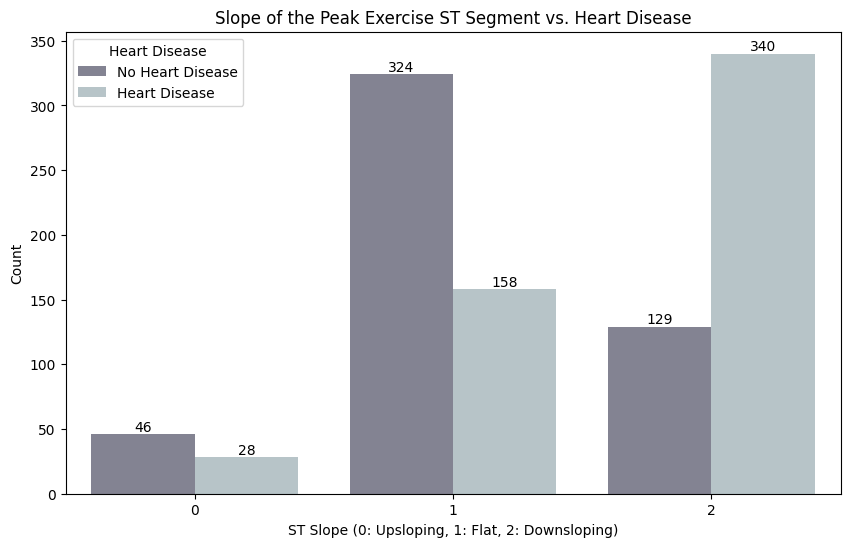

In [18]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='slope', hue='target', data=df, palette='bone', alpha = 0.7)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Slope of the Peak Exercise ST Segment vs. Heart Disease')
plt.xlabel('ST Slope (0: Upsloping, 1: Flat, 2: Downsloping)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper left', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

#### Observation
This bar chart shows that patients who have a downsloping ST segment are far more likely to have heart disease, numbering 340 compared with 129 in the upsloping or flat ST segment category. On the other hand, an upsloping or flat ST segment is highly prevalent in those patients without heart disease. This says that the slope of ST is such a very strong predictor of heart disease risk.


### 12. Number of Major Vessels Colored by Fluoroscopy vs. Heart Disease

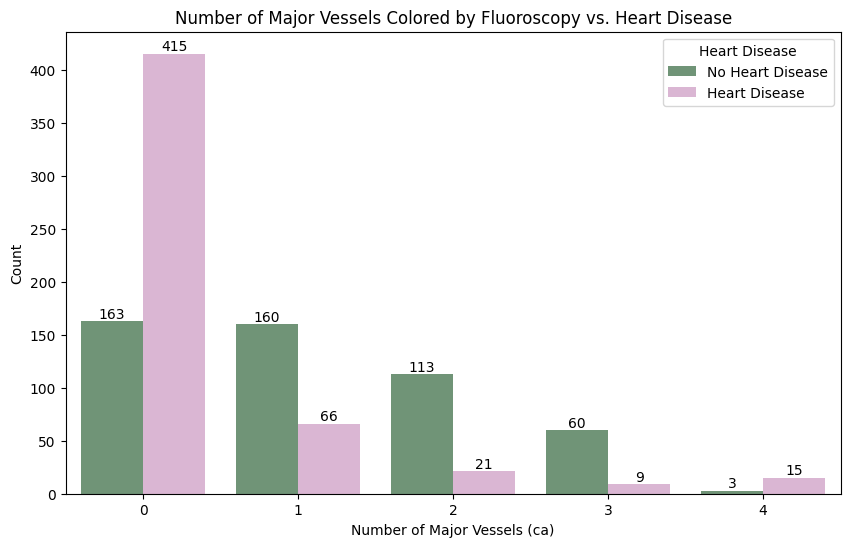

In [19]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='ca', hue='target', data=df, palette='cubehelix', alpha = 0.7)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Number of Major Vessels Colored by Fluoroscopy vs. Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()


#### Observation
This bar chart shows that 0 major vessels colored by fluoroscopy are strongly associated with heart disease, with 415 versus 163 cases. While at the same time, 1 or more colored vessels were more frequent in patients without heart disease, and this trend decreased as the number of colored vessels increased. The inference would thus be that the number of colored vessels represents one of the major indicative factors for heart disease.

### 13. Thalassemia vs. Heart Disease

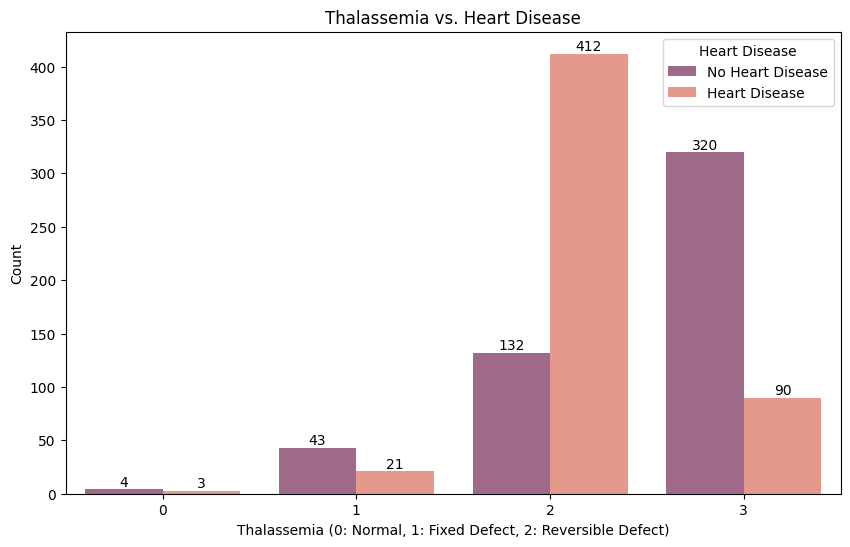

In [20]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='thal', hue='target', data=df, palette='rocket', alpha = 0.7, )
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Thalassemia vs. Heart Disease')
plt.xlabel('Thalassemia (0: Normal, 1: Fixed Defect, 2: Reversible Defect)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
#plt.show()
plt.savefig('h_chart13.png')

#### Observation
The bar chart represents a strong relationship between Thalassemia types and heart disease. The strongest association is that of Thalassemia Type 2, Reversible Defect, which also includes the highest number of heart cases against the disease. On the other hand, Thalassemia Type 0 has the least association, which means it's Normal. Generally, Thalassemia type has much to do with increasing the risk of developing heart diseases, especially Type 2.